In [8]:
import pandas as pd
import numpy as np

# EASEクラスの再定義
class EASE:
    def __init__(self, lambda_: float):
        self.lambda_ = lambda_
        self.B = None

    def fit(self, X: np.ndarray):
        G = X.T @ X
        diag_indices = np.diag_indices(G.shape[0])
        G[diag_indices] += self.lambda_

        P = np.linalg.inv(G)
        self.B = P / (-np.diag(P))
        self.B[diag_indices] = 0

    def predict(self, X: np.ndarray) -> np.ndarray:
        return X @ self.B

# CSVファイルの読み込み
file_path = './animal_recommendation_data.csv'
df = pd.read_csv(file_path)

# ユーザーアイテム行列の作成
user_item_matrix = pd.get_dummies(df.set_index('user_id')['animal']).groupby('user_id').sum().astype(float)

# NumPy配列に変換
X = user_item_matrix.values

# EASEモデルのインスタンスを作成
ease_model = EASE(lambda_=0.5)

# モデルをフィッティング
ease_model.fit(X)

# 推奨スコアを計算
recommendations = ease_model.predict(X)

# 結果をデータフレームに変換
recommendation_df = pd.DataFrame(recommendations, index=user_item_matrix.index, columns=user_item_matrix.columns)

# 推奨結果の表示
recommendation_df


,Bird,Cat,Dog,Fish,Hamster,Rabbit,Turtle
user_id,,,,,,,
1,0.227447,0.429694,0.322394,-0.169731,-0.059742,0.721588,0.082909
2,0.324127,0.337118,0.246949,0.464697,0.093656,0.018205,-0.302545
3,0.197762,0.286463,0.708474,-0.180127,0.448178,0.781520,0.241455
4,0.188684,-0.099563,0.023342,0.614064,-0.136788,0.231542,0.506182
5,0.299299,0.508297,0.483237,0.496936,-0.066538,0.428241,0.251636
6,0.534825,-0.078603,0.169202,0.195579,0.370692,0.078137,-0.168727
7,0.188684,-0.099563,0.023342,0.614064,-0.136788,0.231542,0.506182
8,-0.012936,0.702183,0.786222,0.088991,0.171142,0.721588,0.107636
9,0.215555,0.572926,-0.378429,0.226483,0.350306,0.004934,0.482909


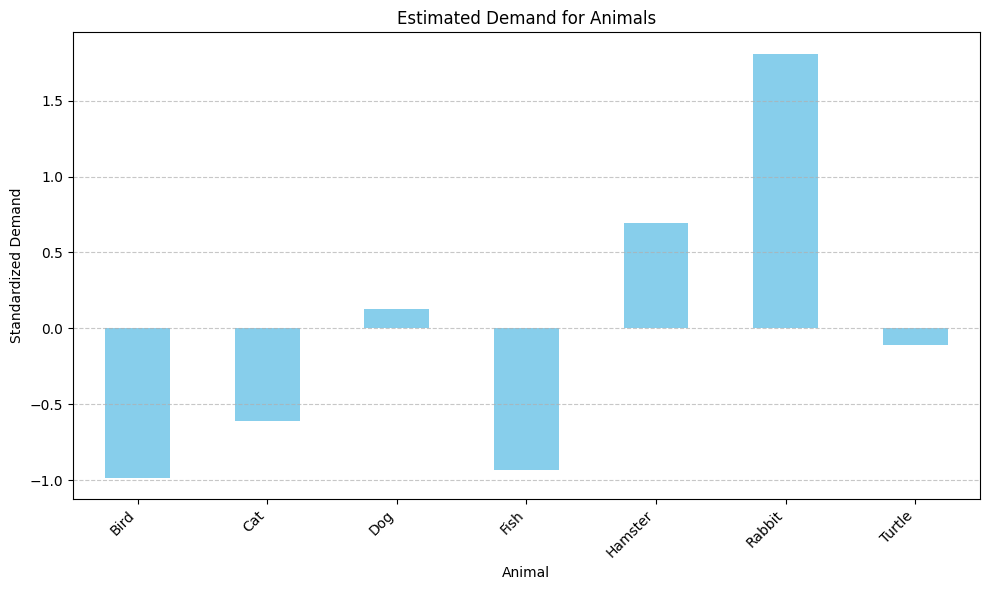

In [22]:
from matplotlib import pyplot as plt
# 推定需要の計算
# 1. 推奨スコアの合計から、すでにユーザーが好きな動物の数を引く
estimated_demands = recommendation_df.sum(axis=0) - user_item_matrix.sum(axis=0)

# 2. 標準化（平均を引いて標準偏差で割る）して、需要の変動を理解しやすくする
estimated_demands = (estimated_demands - estimated_demands.mean()) / estimated_demands.std()

# 推定需要のプロット
plt.figure(figsize=(10, 6))
estimated_demands.plot(kind='bar', color='skyblue')
plt.title('Estimated Demand for Animals')
plt.xlabel('Animal')
plt.ylabel('Standardized Demand')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()